In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random

In [19]:
# Define the data directory
data_dir = 'C:/Users/ADMIN/Desktop/chest_xray'
categories = ['NORMAL', 'PNEUMONIA']

# Initialize an empty dataframe to hold the counts
data_counts = []

# Loop through each subfolder
for phase in ['train', 'val', 'test']:
    for category in categories:
        folder_path = os.path.join(data_dir, phase, category)
        count = len(os.listdir(folder_path))
        data_counts.append({'Phase': phase, 'Category': category, 'Count': count})

# Convert to DataFrame
df_counts = pd.DataFrame(data_counts)
print(df_counts)

   Phase   Category  Count
0  train     NORMAL   1341
1  train  PNEUMONIA   3875
2    val     NORMAL      8
3    val  PNEUMONIA      8
4   test     NORMAL    234
5   test  PNEUMONIA    390


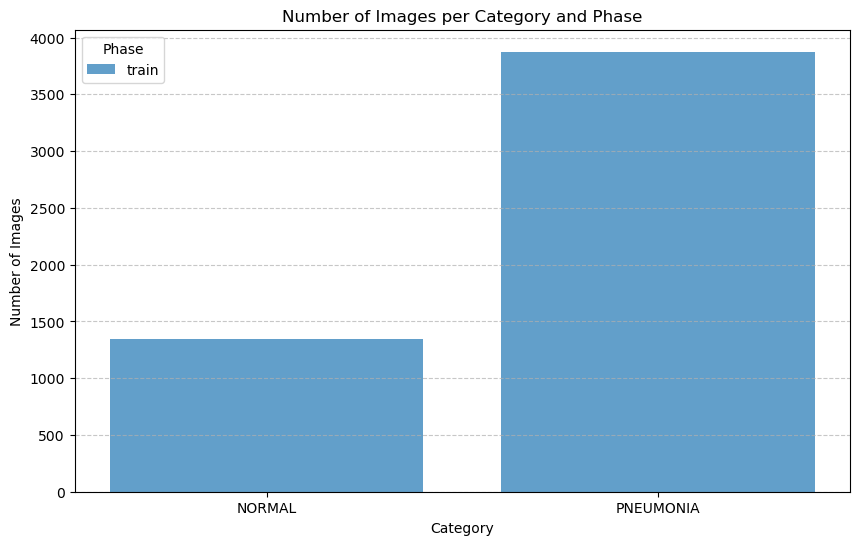

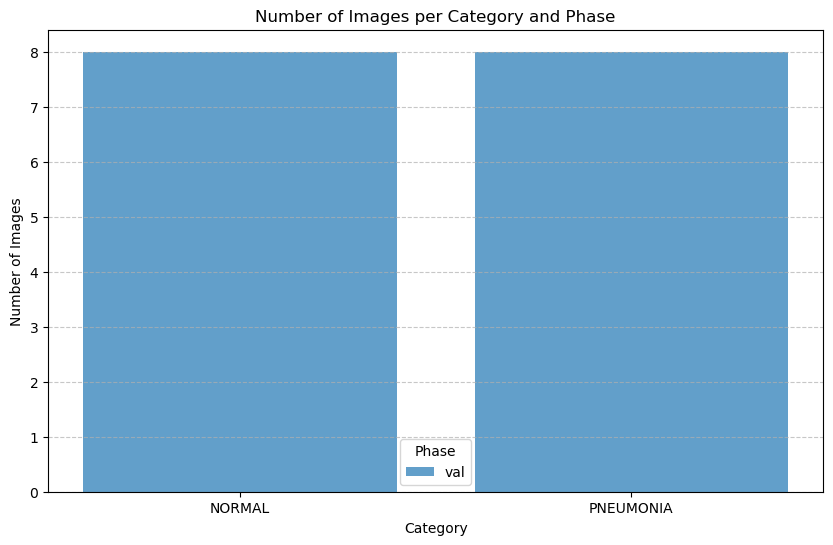

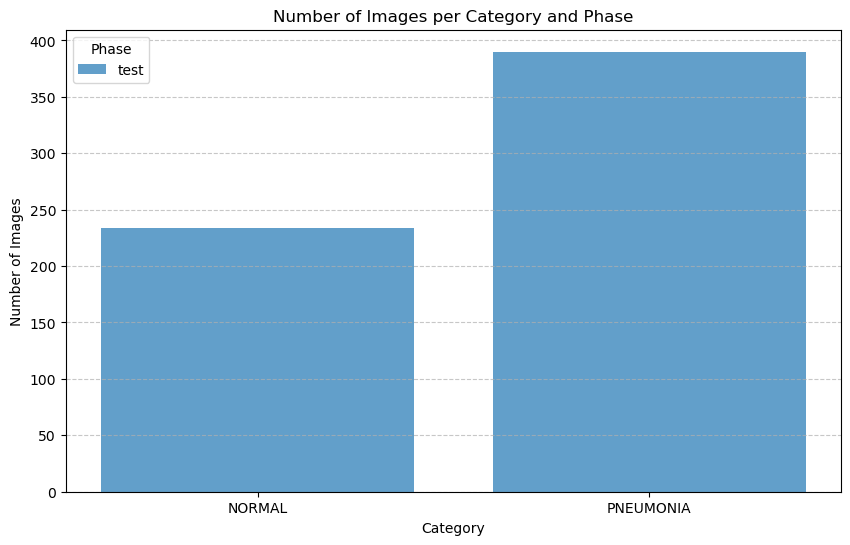

In [26]:
# Bar chart of image counts
for phase in df_counts['Phase'].unique():
    plt.figure(figsize=(10, 6))
    subset = df_counts[df_counts['Phase'] == phase]
    plt.bar(subset['Category'], subset['Count'], alpha=0.7, label=phase)
    plt.title('Number of Images per Category and Phase')
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=0)
    plt.legend(title='Phase')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

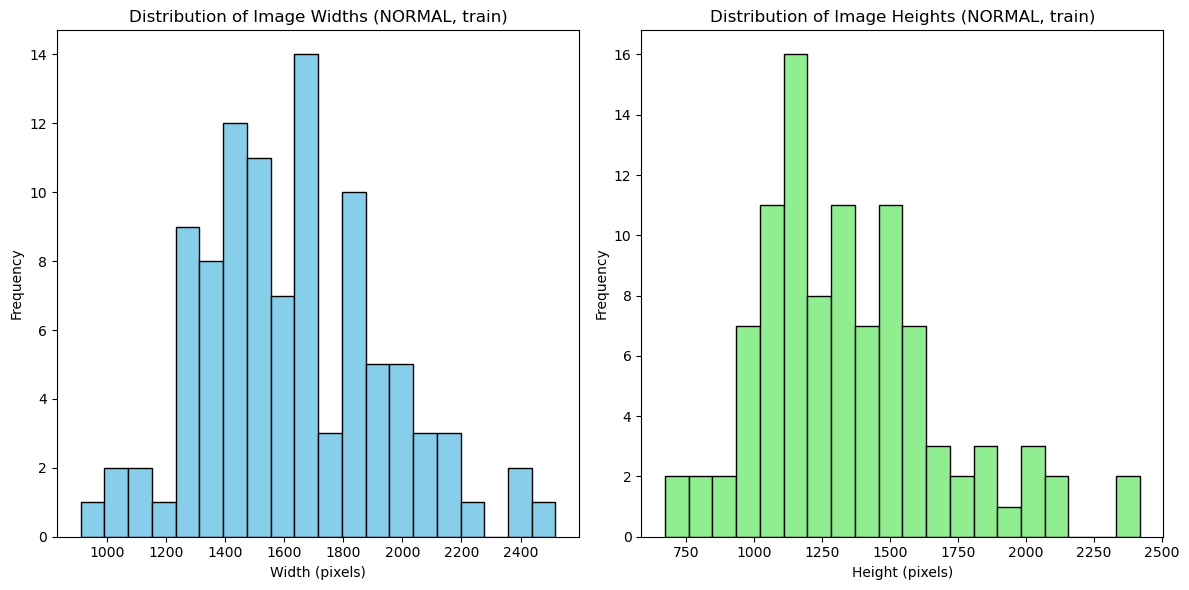

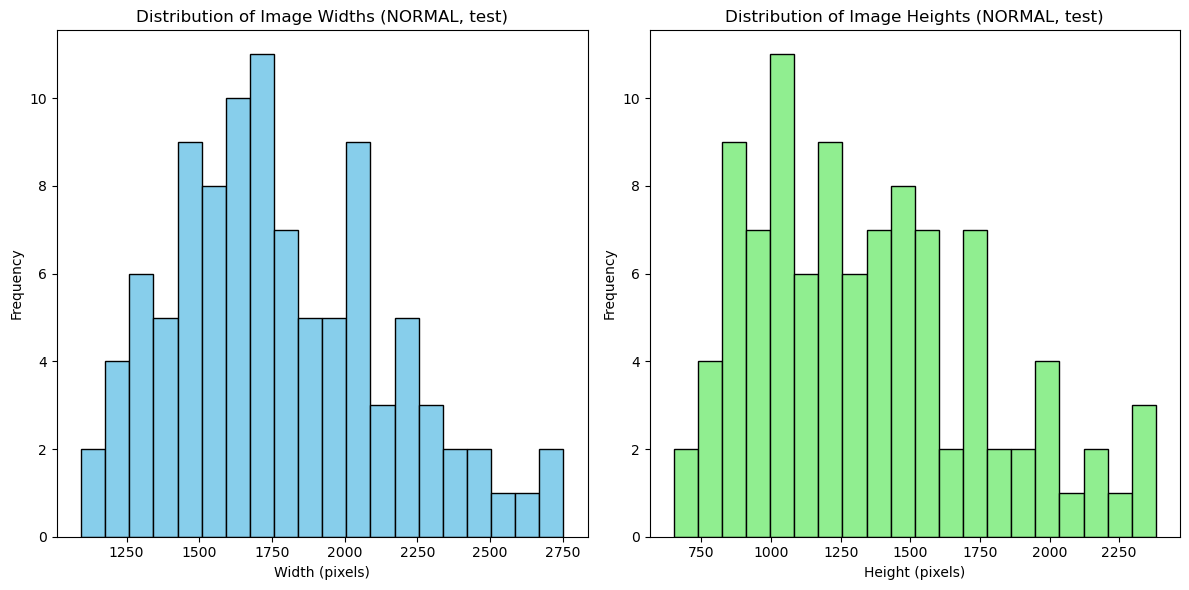

In [31]:
for phase in ['train', 'test']:
    # Load sample images and get their sizes for NORMAL in train phase
    normal_images = os.listdir(os.path.join(data_dir, phase, 'NORMAL'))
    sizes = []

    for img in random.sample(normal_images, 100):  # Sample 100 images
        img_path = os.path.join(data_dir, phase, 'NORMAL', img)
        with Image.open(img_path) as im:
            sizes.append(im.size)

    widths, heights = zip(*sizes)

    # Histogram of image widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Image Widths (NORMAL, {phase})')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of Image Heights (NORMAL, {phase})')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
plt.show()